In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import requests
from bs4 import BeautifulSoup

import pandas as pd

In [59]:
driver = webdriver.Chrome("chromedriver")

driver.set_window_size(700, 1000)
driver.get(" https://www.mangoplate.com/search/{0}?keyword={0}&page={1}".format('서울시', 1))

time.sleep(2)

data = driver.find_elements(By.CSS_SELECTOR, "li.server_render_search_result_item > div.list-restaurant-item")
print(data)
driver.close()

[<selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="0b3dc694-0d4f-4b9e-8ad0-9290ce70dc5f")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="a6e72f31-b4bb-4e36-a473-093b7c92ab1f")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="5f245abc-fa07-40f3-a80d-8b88e81b1b44")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="3ade974c-43dd-49b0-9a1f-61b2a4fdb3ea")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="6dffbf0a-1879-4cc6-b485-66f305390767")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="52ad4f85-7268-4e9a-aa91-6b161d73c6b3")>, <selenium.webdriver.remote.webelement.WebElement (session="f24d7b358197feba07e6eac6de97ecbb", element="b2adecb6-ccbc-41ba-a452-8d7825e2

In [46]:
def mango(data) :
    
    df = pd.DataFrame()

    title_lst = []
    rating_lst = []
    cate_lst = []
    view_lst = []
    re_lst = []

    for item in data :
        title = item.select_one('h2.title').text.replace('\n', '')
        rating = item.select_one('strong.search_point').text
        category = item.select_one('p.etc').text.split('-')[1]
        view = item.select_one('span.view_count').text
        review = item.select_one('span.review_count').text

        title_lst.append(title)
        rating_lst.append(rating)
        cate_lst.append(category)
        view_lst.append(view)
        re_lst.append(review)

    df['Title'] = title_lst
    df['Rating'] = rating_lst
    df['Category'] = cate_lst
    df['View'] = view_lst
    df['Review'] = re_lst
    
    return df

def final_mangoplate(keyword) :
    
    headers = {'User-Agent' : 'Mozilla.5.0'}
    result = pd.DataFrame()

    for i in range(10) :
        res = requests.get("https://www.mangoplate.com/search/{0}?keyword={0}&page={1}".format(keyword, i+1), headers = headers)
        time.sleep(2)

        soup = BeautifulSoup(res.text, 'html.parser')
        data = soup.select("li.server_render_search_result_item > div.list-restaurant-item")

        df0 = mango(data)

        result = pd.concat([result, df0], axis = 0)
        
    return result


In [47]:
key_lst = ['노원구', '중랑구', '광진구', '도봉구', '강북구', '동대문구', '성동구', '성북구',
           '종로구', '중구', '용산구', '은평구', '서대문구', '마포구' ,'강서구', '양천구', '구로구', 
           '영등포구', '금천구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
final_df = pd.DataFrame()

for key in key_lst :
    
    final = final_mangoplate(key)
    final_df = pd.concat([final_df, final], axis = 0)


In [48]:
final_df.shape

(5000, 5)

In [57]:
len(key_lst) * 200

5000

In [50]:
final_df.to_csv('MangoPlate_서울2.csv')

In [54]:
pd.read_csv('MangoPlate_서울2.csv')


,Unnamed: 0,Title,Rating,Category,View,Review
0,0,스시하쿠야,4.4,회 / 스시,"20,792",8
1,1,노원목고기집,4.3,고기 요리,"85,225",34
2,2,경성초밥,4.3,회 / 스시,"36,925",19
3,3,당혹,4.3,카페 / 디저트,"16,056",12
4,4,땅코참숯구이 (노원점),4.3,고기 요리,"16,174",18
...,...,...,...,...,...,...
4995,15,크레이빙커피,NaN,카페 / 디저트,574,0
4996,16,독도쭈꾸미 (성내점),NaN,해산물 요리,"6,736",18
4997,17,휘스펍,NaN,치킨 / 호프 / 펍,"5,937",6
4998,18,깐부치킨 (고덕역점),NaN,닭 / 오리 요리,"4,796",7


In [51]:
lst = list(final_df['Title'])
len(lst), len(set(lst))

(5000, 4954)

In [52]:
ffinal_df = final_df.drop_duplicates(subset = 'Title')

In [53]:
lst = list(ffinal_df['Title'])
len(lst), len(set(lst))

(4954, 4954)

In [55]:
ffinal_df.to_csv('final_MangoPlate_서울.csv')

In [1]:
ffinal_df

NameError: name 'ffinal_df' is not defined

In [80]:
test.sort_values('kakao_rating', ascending = False)

,new,Category,도로명,kakao_rating,mango_rating,yogiyo_rating
1007,멕시칼리,양식,서울 광진구 능동로36길 181 1층 멕시칼리,29.613693,15.734284,NaN
8991,인크커피 가산 플래그십 스토어,커피전문점,"서울 금천구 가산디지털2로 127-20 B03호, 101호,103호,201호",28.997325,NaN,NaN
5798,우리우동,국수,서울 은평구 대서문길 7 1층,28.843570,NaN,NaN
825,자가제빵선명희피자 면목본점,피자,서울 중랑구 면목로48길 11,28.781292,NaN,NaN
5992,만동제과,"제과,베이커리",서울 서대문구 연희로 32 1층,28.673381,NaN,NaN
...,...,...,...,...,...,...
10330,룸카페쁠레쟝 천호점,테마카페,서울 강동구 천호대로157길 6 지하1층,NaN,NaN,NaN
10332,할리스 굽은다리역점,커피전문점,서울 강동구 양재대로 1591 1층,NaN,NaN,NaN
10345,미테이블 강동직영점,양식,서울 강동구 양재대로111길 15 1층 건물안쪽 경비실 앞,NaN,NaN,NaN
10400,투썸플레이스 길동점,커피전문점,서울 강동구 천호대로 1207,NaN,NaN,NaN


In [134]:
kakao.head()

,Category,Rating,RatingNum,Review,new,도로명,latitude,longitude,행정구,newReview,final
0,"육류,고기",3.4,61건,135,강강술래 상계지점,서울 노원구 동일로 1628 1층,37.673692,127.055257,노원구,4.905275,16.677934
1,한식,4.9,385건,228,감동식당,서울 노원구 한글비석로47길 58 1층,37.659783,127.066045,노원구,5.429346,26.603794
2,양식,4.2,47건,250,로니로티 노원점,서울 노원구 상계로 63-7 청우빌딩 2층 201호,37.656717,127.063254,노원구,5.521461,23.190136
3,디저트카페,3.9,112건,355,라라브레드 공릉점,서울 노원구 공릉로41길 32,37.624630,127.078503,노원구,5.872118,22.901259
4,한식,4.7,126건,171,경복식당,서울 노원구 공릉로39길 10,37.623748,127.078514,노원구,5.141664,24.165819


In [136]:
test_df = kakao[['new', 'Category', '도로명','행정구', 'latitude', 'longitude', 'final']]

# 고기/육류
meat = ['갈비', '불고기,두루치기', '오리', '삼겹살','곱창,막창', '육류,고기', '닭요리', '고기뷔페']
#kakao 카테고리 정리
cafe = ['북카페', '커피전문점', '테마카페', '보드카페', '전통찻집', '애견카페', '고양이카페', '만화카페', '무인카페', '도넛', '갤러리카페', 
       '간식', '떡,한과', '아이스크림', '떡카페', '사주카페', '초콜릿', '다방', '라이브카페', '제과,베이커리', '디저트카페', '키즈카페',
       '샐러드', '카페', '샌드위치']
#'돈까스, 회, 일식' 
japan = ['돈까스,우동', '일식','초밥,롤', '일식집', '일본식라면', '퓨전일식']
#'한식'
korea = ['샤브샤브', '설렁탕', '감자탕', '찌개,전골',  '매운탕,해물탕', '사철탕,영양탕', '해장국', '곰탕', '죽','한정식',
       '두부전문점', '퓨전한식','한식뷔페',  '순대', '복어', '국수', '장어', '추어', '아구', '국밥',
        '기사식당', '쌈밥', '수제비', '삼계탕', '냉면', '철판요리']
# '야식' 
night = ['칵테일바', '술집', '와인바',  '일본식주점', '호프,요리주점', '실내포장마차']
#'양식'
italy = ['이탈리안',  '패밀리레스토랑', '스테이크,립']
# 패스트푸드
fast = ['햄버거', '토스트', '구내식당', '푸드코트', '도시락']
# 치킨
ch = ['닭강정', '치킨']
# 피자
pi = ['피자']
# 중국집
china = ['중국요리', '중식', '퓨전중식']
#해산물/회
sea = ['조개', '게,대게', '해물,생선', '장어', '참치회', '회', '바닷가재','해산물뷔페',  '복어', '굴,전복']
# 족발/보쌈
jj = ['족발,보쌈']
# 아시안
asian = ['태국음식', '베트남음식', '아시아음식', '인도음식', '동남아음식',  '멕시칸,브라질', '양꼬치', '터키음식', '퓨전요리', 
         '뷔페', '음식점', '채식뷔페']
# 분식
dd = ['떡볶이', '분식', '오뎅바']


for x in test_df['Category'] :
    if x in cafe :
        test_df['Category'] = test_df['Category'].replace(x, '카페/디저트')
    elif x in japan :
        test_df['Category'] = test_df['Category'].replace(x, '돈까스, 일식')
    elif x in korea :
        test_df['Category'] = test_df['Category'].replace(x, '한식')
    elif x in night :
        test_df['Category'] = test_df['Category'].replace(x, '야식')
    elif x in italy :
        test_df['Category'] = test_df['Category'].replace(x, '양식')
    elif x in fast :
        test_df['Category'] = test_df['Category'].replace(x, '패스트푸드')
    elif x in ch :
        test_df['Category'] = test_df['Category'].replace(x, '치킨')
    elif x in china :
        test_df['Category'] = test_df['Category'].replace(x, '중식')
    elif x in sea :
        test_df['Category'] = test_df['Category'].replace(x, '해산물/회')
    elif x in asian :
        test_df['Category'] = test_df['Category'].replace(x, '그 외 나라')
    elif x in dd :
        test_df['Category'] = test_df['Category'].replace(x, '분식')
    elif x in meat :
        test_df['Category'] = test_df['Category'].replace(x, '고기/육류') 

C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9048\520431802.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = test_df['Category'].replace(x, '고기/육류')
C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9048\520431802.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = test_df['Category'].replace(x, '카페/디저트')
C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9048\520431802.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [138]:
test_df.sort_values('final', ascending = False)

,new,Category,도로명,행정구,latitude,longitude,final
1007,멕시칼리,양식,서울 광진구 능동로36길 181 1층 멕시칼리,광진구,37.556503,127.079056,29.613693
8991,인크커피 가산 플래그십 스토어,카페/디저트,"서울 금천구 가산디지털2로 127-20 B03호, 101호,103호,201호",금천구,37.480258,126.878925,28.997325
5798,우리우동,한식,서울 은평구 대서문길 7 1층,은평구,37.656804,126.948475,28.843570
825,자가제빵선명희피자 면목본점,피자,서울 중랑구 면목로48길 11,중랑구,37.582047,127.090996,28.781292
5992,만동제과,카페/디저트,서울 서대문구 연희로 32 1층,서대문구,37.578465,126.935502,28.673381
...,...,...,...,...,...,...,...
10330,룸카페쁠레쟝 천호점,카페/디저트,서울 강동구 천호대로157길 6 지하1층,강동구,37.538980,127.127460,NaN
10332,할리스 굽은다리역점,카페/디저트,서울 강동구 양재대로 1591 1층,강동구,37.552640,127.144157,NaN
10345,미테이블 강동직영점,양식,서울 강동구 양재대로111길 15 1층 건물안쪽 경비실 앞,강동구,37.537458,127.137600,NaN
10400,투썸플레이스 길동점,카페/디저트,서울 강동구 천호대로 1207,강동구,37.546650,127.173241,NaN


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_df27 = test_df.drop(['mango_rating', 'yogiyo_rating'], axis = 1).sort_values('kakao_rating', ascending = False)
final_df27 = final_df27.rename(columns = {'kakao_rating' : 'Final_rating'})

for x in final_df27['Final_rating'] :
    if (x == float('inf')):
        final_df27['Final_rating'] = final_df27['Final_rating'].replace(x, 0)
        
final_df27['Final_rating'] = final_df27['Final_rating'].fillna(0)        
        
        
        
# final_df27['Final_rating'] = final_df27['Final_rating'].fillna(0)
final_df27['Final_rating'] = final_df27['Final_rating'].astype(int)
# final_df27['Final_rating'] = final_df27['Final_rating'].fillna(-1).astype('int').replace({-1: None})
# final_df27['Final_rating'] = final_df27['Final_rating'].fillna(0)
# scaled_rating = scaler.fit_transform(final_df27['Final_rating'])
# final_df27['Final_rating'] = scaled_rating
final_df27

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = Normalizer()

# final_df27 = test_df.drop(['mango_rating', 'yogiyo_rating'], axis = 1).sort_values('kakao_rating', ascending = False)
final_df27 = final_df27.rename(columns = {'final' : 'Final_rating'})  

final_df27 = final_df27[final_df27['Final_rating'] > 0]

scaled_rating = scaler.fit_transform(final_df27[['Final_rating']])
final_df27['Final_rating'] = scaled_rating
final_df27

,new,Category,도로명,Final_rating
1007,멕시칼리,양식,서울 광진구 능동로36길 181 1층 멕시칼리,1.0
8991,인크커피 가산 플래그십 스토어,카페/디저트,"서울 금천구 가산디지털2로 127-20 B03호, 101호,103호,201호",1.0
5798,우리우동,한식,서울 은평구 대서문길 7 1층,1.0
825,자가제빵선명희피자 면목본점,피자,서울 중랑구 면목로48길 11,1.0
5992,만동제과,카페/디저트,서울 서대문구 연희로 32 1층,1.0
...,...,...,...,...
1428,개미집,한식,서울 광진구 아차산로29길 18,1.0
10102,주양명가돈까스 명일본점,"돈까스, 일식",서울 강동구 동남로73길 26,1.0
7902,롯데리아 목동점,패스트푸드,서울 양천구 신목로 72,1.0
785,일번지소한마리,고기/육류,서울 중랑구 상봉로 33 1층,1.0


In [143]:
# final_df27 = test_df.drop(['mango_rating', 'yogiyo_rating'], axis = 1).sort_values('kakao_rating', ascending = False)
final_df27 = test_df.copy()
final_df27 = final_df27.rename(columns = {'final' : 'Final_rating'})  

final_df27 = final_df27[final_df27['Final_rating'] > 0]

final_df27.isnull().sum()
final_df27 = final_df27.dropna(axis = 0)
final_df27 = final_df27.sort_values('Final_rating', ascending = False).reset_index(drop = True)
final_df27

,new,Category,도로명,행정구,latitude,longitude,Final_rating
0,멕시칼리,양식,서울 광진구 능동로36길 181 1층 멕시칼리,광진구,37.556503,127.079056,29.613693
1,인크커피 가산 플래그십 스토어,카페/디저트,"서울 금천구 가산디지털2로 127-20 B03호, 101호,103호,201호",금천구,37.480258,126.878925,28.997325
2,우리우동,한식,서울 은평구 대서문길 7 1층,은평구,37.656804,126.948475,28.843570
3,자가제빵선명희피자 면목본점,피자,서울 중랑구 면목로48길 11,중랑구,37.582047,127.090996,28.781292
4,만동제과,카페/디저트,서울 서대문구 연희로 32 1층,서대문구,37.578465,126.935502,28.673381
...,...,...,...,...,...,...,...
9854,개미집,한식,서울 광진구 아차산로29길 18,광진구,37.542583,127.068929,1.316980
9855,주양명가돈까스 명일본점,"돈까스, 일식",서울 강동구 동남로73길 26,강동구,37.552880,127.155238,1.247665
9856,롯데리아 목동점,패스트푸드,서울 양천구 신목로 72,양천구,37.517332,126.877348,1.247665
9857,일번지소한마리,고기/육류,서울 중랑구 상봉로 33 1층,중랑구,37.598153,127.092698,1.098612


In [144]:
final_df27.isnull().sum()

new             0
Category        0
도로명             0
행정구             0
latitude        0
longitude       0
Final_rating    0
dtype: int64

In [146]:
final_df27 = final_df27.rename(columns = {'new' : 'Store'})
final_df27.to_csv('final_df27.csv', encoding = 'cp949')

# 데이터 병합

In [2]:
import pandas as pd

kakao = pd.read_csv('test_행정구.csv', encoding = 'cp949')
mango = pd.read_csv('final_MangoPlate_서울.csv')
# mango.to_csv('final_MangoPlate_서울.csv', encoding = 'cp949')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 51: invalid start byte

In [8]:
kakao = pd.read_csv('test_행정구.csv', encoding = 'cp949').drop(['Unnamed: 0'], axis = 1).rename(columns = {'newTitle': 'new'})
mango = pd.read_csv('final_MangoPlate_서울.csv', encoding = 'cp949').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [9]:
new = []
for x in mango['Title'] :
    if '(' in x :
        y = x.replace('(', ' ')
        y = y.replace(')', '')
        new.append(y)
    else :
        new.append(x)
mango['new'] = new

a = []
b = []
for x in mango['new'] :
    x = x.rstrip()
    x = x.lstrip()
    a.append(x)
mango['new'] = a
    
for x in kakao['new'] :
    x = x.rstrip()
    x = x.lstrip()
    b.append(x)
kakao['new'] = b

In [10]:
lst = []
for x in kakao['Review'] :#.astype('int')
    x = int(x.replace(',', ''))
    lst.append(x)
kakao['Review'] = lst
kakao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10473 entries, 0 to 10472
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   10381 non-null  object 
 1   Rating     10217 non-null  float64
 2   RatingNum  10217 non-null  object 
 3   Review     10473 non-null  int64  
 4   new        10473 non-null  object 
 5   도로명        10473 non-null  object 
 6   latitude   10473 non-null  float64
 7   longitude  10473 non-null  float64
 8   행정구        10473 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 736.5+ KB


In [11]:
final = []

for x in mango['Review'] :
    y = np.log(x)
    final.append(y)
    
mango['newReview'] = final
mango

mango['final'] = mango['Rating'] * mango['newReview']
mango.sort_values('final', ascending = False)

C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9532\1672146781.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


,Title,Rating,Category,View,Review,new,newReview,final
1804,우래옥,4.5,국수 / 면 요리,"318,942",471,우래옥,6.154858,27.696861
2080,바토스 (이태원점),4.3,남미 음식,"234,844",616,바토스 이태원점,6.423247,27.619962
2035,보니스피자펍,4.4,기타 양식,"302,896",456,보니스피자펍,6.122493,26.938968
2017,브라이리퍼블릭 (이태원점),4.5,세계음식 기타,"470,311",382,브라이리퍼블릭 이태원점,5.945421,26.754393
1696,정돈 (대학로 본점),4.2,까스 요리,"377,052",510,정돈 대학로 본점,6.234411,26.184525
...,...,...,...,...,...,...,...,...
1588,Red불닭발,NaN,닭 / 오리 요리,"1,600",0,Red불닭발,-inf,NaN
1589,이태리총각 (성북동점),NaN,이탈리안,"14,900",16,이태리총각 성북동점,2.772589,NaN
1590,당신의나의케이크,NaN,카페 / 디저트,"16,344",12,당신의나의케이크,2.484907,NaN
1591,카페 어거스티,NaN,카페 / 디저트,"4,325",6,카페 어거스티,1.791759,NaN


In [2]:
kakao.head()

,Category,Rating,RatingNum,Review,new,도로명,latitude,longitude,행정구
0,"육류,고기",3.4,61건,135,강강술래 상계지점,서울 노원구 동일로 1628 1층,37.673692,127.055257,노원구
1,한식,4.9,385건,228,감동식당,서울 노원구 한글비석로47길 58 1층,37.659783,127.066045,노원구
2,양식,4.2,47건,250,로니로티 노원점,서울 노원구 상계로 63-7 청우빌딩 2층 201호,37.656717,127.063254,노원구
3,디저트카페,3.9,112건,355,라라브레드 공릉점,서울 노원구 공릉로41길 32,37.624630,127.078503,노원구
4,한식,4.7,126건,171,경복식당,서울 노원구 공릉로39길 10,37.623748,127.078514,노원구


In [7]:
import numpy as np
import pandas as pd

kakao = pd.read_csv('test_행정구.csv', encoding = 'cp949').drop(['Unnamed: 0'], axis = 1).rename(columns = {'newTitle': 'new'})

lst = []
for x in kakao['Review'] :#.astype('int')
    x = int(x.replace(',', ''))
    lst.append(x)
kakao['Review'] = lst
kakao.info()


final = []

for x in kakao['Review'] :
    y = np.log(x)
    final.append(y)
kakao['NewReview'] = final
kakao

kakao['FinalRating'] = kakao['Rating'] * kakao['NewReview']
kakao[['Rating','NewReview', 'FinalRating']].sort_values('FinalRating', ascending = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10473 entries, 0 to 10472
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   10381 non-null  object 
 1   Rating     10217 non-null  float64
 2   RatingNum  10217 non-null  object 
 3   Review     10473 non-null  int64  
 4   new        10473 non-null  object 
 5   도로명        10473 non-null  object 
 6   latitude   10473 non-null  float64
 7   longitude  10473 non-null  float64
 8   행정구        10473 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 736.5+ KB


C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9532\3383275729.py:17: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
C:\Users\1dk1d\AppData\Local\Temp\ipykernel_9532\3383275729.py:17: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


,Rating,NewReview,FinalRating
1007,4.7,6.300786,29.613693
8991,4.4,6.590301,28.997325
5798,4.4,6.555357,28.843570
825,4.3,6.693324,28.781292
5992,4.3,6.668228,28.673381
...,...,...,...
10330,NaN,1.098612,NaN
10332,NaN,1.945910,NaN
10345,NaN,4.290459,NaN
10400,NaN,1.791759,NaN


In [12]:
df1 =  mango[['new', 'final']]
df0 = kakao[['new', 'Category', '도로명', 'final']].rename(columns = {'final' : 'final_rating'})
data = pd.merge(df0, df1, on = 'new', how = 'left')
data.sort_values('final_rating', ascending = False)

KeyError: "['final'] not in index"

In [44]:
yo = pd.read_csv('최종요기요_서울.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

In [53]:
import numpy as np

final = []

for x in yo['ReviewNum'] :
    y = np.log(x)
    final.append(y)
yo['newReview'] = final
yo = yo.rename(columns = {'Title' : 'new'})

yo['final'] = yo['Rating'] * yo['newReview']
yo.sort_values('final', ascending = False)

,new,Rating,ReviewNum,newReview,final
5479,BHC 월곡점,4.9,29561,10.294211,50.441635
11484,가화만사성,4.7,23887,10.081090,47.381121
6958,멘부리,4.9,14616,9.589872,46.990373
13240,매운국물떡볶이밀방떡딜리버리 본점,4.8,15164,9.626679,46.208061
15675,샤오차이,4.7,18419,9.821138,46.159349
...,...,...,...,...,...
10687,미스터갈매기 홍은점,5.0,1,0.000000,0.000000
10677,체리브라운,5.0,1,0.000000,0.000000
10676,따뜻한식탁 증산점,1.0,1,0.000000,0.000000
10651,응암동커피,5.0,1,0.000000,0.000000


In [59]:
# 
yoo = yo[['new', 'final']]
test = pd.merge(data, yoo, on = 'new', how = 'left')
test = test.rename(columns = {'final_rating' : 'kakao_rating', 'final_x' : 'mango_rating', 'final_y' : 'yogiyo_rating'})

In [14]:
lst = ['육류,고기', '한식', '양식', '디저트카페', '샤브샤브', '닭요리', '두부전문점', '삼겹살',
       '게,대게', '한정식', '조개', '수제비', '해물,생선', '장어', '설렁탕', '갈비', '카페', '국수',
       '베트남음식', '떡볶이', '감자탕', '이탈리안', '중국요리', '냉면', '참치회', '회', '일식',
       '족발,보쌈', '태국음식', '곱창,막창', '돈까스,우동', '초밥,롤', '양꼬치', '패밀리레스토랑', '중식',
       '커피전문점', '호프,요리주점', '피자','아시아음식', '일본식주점', '일식집', '제과,베이커리',
       '해장국', '패스트푸드', '스테이크,립', '삼계탕', '음식점', '실내포장마차', '테마카페', '국밥',
       '일본식라면', '오리', '아구', '샌드위치', '인도음식', '쌈밥', '사철탕,영양탕', '치킨', '햄버거',
       '키즈카페', '분식', '찌개,전골', '보드카페', '술집', '기사식당', '와인바', '복어', '순대',
       '북카페', '매운탕,해물탕', '애견카페', '칵테일바', '해산물뷔페', '뷔페', '퓨전한식', '바닷가재',
       '고기뷔페', '전통찻집', '동남아음식', '불고기,두루치기', '추어', '고양이카페', '만화카페',
       '멕시칸,브라질', '곰탕', '토스트', '굴,전복', '닭강정', '무인카페', '도넛', '한식뷔페',
       '퓨전요리', '죽', '떡,한과', '도시락', '아이스크림', '퓨전일식', '갤러리카페', '간식',
       '라이브카페', '샐러드', '다방', '초콜릿', '퓨전중식', '푸드코트', '터키음식', '채식뷔페',
       '철판요리', '떡카페', '사주카페', '오뎅바', '구내식당']
len(lst)

112

In [63]:
test['Category'].unique()

array(['육류,고기', '한식', '양식', '디저트카페', '샤브샤브', '닭요리', '두부전문점', '삼겹살',
       '게,대게', '한정식', '조개', '수제비', '해물,생선', '장어', '설렁탕', '갈비', '카페', '국수',
       '베트남음식', '떡볶이', '감자탕', '이탈리안', '중국요리', '냉면', '참치회', '회', '일식',
       '족발,보쌈', '태국음식', '곱창,막창', '돈까스,우동', '초밥,롤', '양꼬치', '패밀리레스토랑', '중식',
       '커피전문점', '호프,요리주점', '피자', nan, '아시아음식', '일본식주점', '일식집', '제과,베이커리',
       '해장국', '패스트푸드', '스테이크,립', '삼계탕', '음식점', '실내포장마차', '테마카페', '국밥',
       '일본식라면', '오리', '아구', '샌드위치', '인도음식', '쌈밥', '사철탕,영양탕', '치킨', '햄버거',
       '키즈카페', '분식', '찌개,전골', '보드카페', '술집', '기사식당', '와인바', '복어', '순대',
       '북카페', '매운탕,해물탕', '애견카페', '칵테일바', '해산물뷔페', '뷔페', '퓨전한식', '바닷가재',
       '고기뷔페', '전통찻집', '동남아음식', '불고기,두루치기', '추어', '고양이카페', '만화카페',
       '멕시칸,브라질', '곰탕', '토스트', '굴,전복', '닭강정', '무인카페', '도넛', '한식뷔페',
       '퓨전요리', '죽', '떡,한과', '도시락', '아이스크림', '퓨전일식', '갤러리카페', '간식',
       '라이브카페', '샐러드', '다방', '초콜릿', '퓨전중식', '푸드코트', '터키음식', '채식뷔페',
       '철판요리', '떡카페', '사주카페', '오뎅바', '구내식당'], dtype=object)

In [71]:
test_df = test.copy()

# 고기/육류
meat = ['갈비', '불고기,두루치기', '오리', '삼겹살','곱창,막창', '육류,고기', '닭요리', '고기뷔페']
#kakao 카테고리 정리
cafe = ['북카페', '커피전문점', '테마카페', '보드카페', '전통찻집', '애견카페', '고양이카페', '만화카페', '무인카페', '도넛', '갤러리카페', 
       '간식', '떡,한과', '아이스크림', '떡카페', '사주카페', '초콜릿', '다방', '라이브카페', '제과,베이커리', '디저트카페', '키즈카페',
       '샐러드', '카페', '샌드위치']
#'돈까스, 회, 일식' 
japan = ['돈까스,우동', '일식','초밥,롤', '일식집', '일본식라면', '퓨전일식']
#'한식'
korea = ['샤브샤브', '설렁탕', '감자탕', '찌개,전골',  '매운탕,해물탕', '사철탕,영양탕', '해장국', '곰탕', '죽','한정식',
       '두부전문점', '퓨전한식','한식뷔페',  '순대', '복어', '국수', '장어', '추어', '아구', '국밥',
        '기사식당', '쌈밥', '수제비', '삼계탕', '냉면', '철판요리']
# '야식' 
night = ['칵테일바', '술집', '와인바',  '일본식주점', '호프,요리주점', '실내포장마차']
#'양식'
italy = ['이탈리안',  '패밀리레스토랑', '스테이크,립']
# 패스트푸드
fast = ['햄버거', '토스트', '구내식당', '푸드코트', '도시락']
# 치킨
ch = ['닭강정', '치킨']
# 피자
pi = ['피자']
# 중국집
china = ['중국요리', '중식', '퓨전중식']
#해산물/회
sea = ['조개', '게,대게', '해물,생선', '장어', '참치회', '회', '바닷가재','해산물뷔페',  '복어', '굴,전복']
# 족발/보쌈
jj = ['족발,보쌈']
# 아시안
asian = ['태국음식', '베트남음식', '아시아음식', '인도음식', '동남아음식',  '멕시칸,브라질', '양꼬치', '터키음식', '퓨전요리', 
         '뷔페', '음식점', '채식뷔페']
# 분식
dd = ['떡볶이', '분식', '오뎅바']


for x in test_df['Category'] :
    if x in cafe :
        test_df['Category'] = test_df['Category'].replace(x, '카페/디저트')
    elif x in japan :
        test_df['Category'] = test_df['Category'].replace(x, '돈까스, 일식')
    elif x in korea :
        test_df['Category'] = test_df['Category'].replace(x, '한식')
    elif x in night :
        test_df['Category'] = test_df['Category'].replace(x, '야식')
    elif x in italy :
        test_df['Category'] = test_df['Category'].replace(x, '양식')
    elif x in fast :
        test_df['Category'] = test_df['Category'].replace(x, '패스트푸드')
    elif x in ch :
        test_df['Category'] = test_df['Category'].replace(x, '치킨')
    elif x in china :
        test_df['Category'] = test_df['Category'].replace(x, '중식')
    elif x in sea :
        test_df['Category'] = test_df['Category'].replace(x, '해산물/회')
    elif x in asian :
        test_df['Category'] = test_df['Category'].replace(x, '그 외 나라')
    elif x in dd :
        test_df['Category'] = test_df['Category'].replace(x, '분식')
    elif x in meat :
        test_df['Category'] = test_df['Category'].replace(x, '고기/육류') 

In [72]:
test_df['Category'].value_counts()

고기/육류      2056
한식         1896
카페/디저트     1856
돈까스, 일식     779
해산물/회       749
야식          622
중식          561
양식          543
그 외 나라      352
분식          257
패스트푸드       239
족발,보쌈       193
치킨          111
피자          101
뷔페           41
음식점          17
구내식당          3
도시락           2
푸드코트          2
채식뷔페          1
Name: Category, dtype: int64

In [76]:
test_df[test_df['Category'] == '음식점']

,new,Category,도로명,kakao_rating,mango_rating,yogiyo_rating
135,미스터회전초밥,음식점,서울 노원구 한글비석로 264,-inf,NaN,NaN
201,춘리마라탕,음식점,서울 노원구 상계로 65,3.515559,NaN,NaN
552,정원분식,음식점,서울 중랑구 면목로44길 7,NaN,NaN,NaN
731,이가김밥,음식점,서울 중랑구 망우로 383,-inf,NaN,NaN
1984,이모네포차,음식점,서울 도봉구 도당로27길 23,NaN,NaN,NaN
2333,바다수산,음식점,서울 강북구 월계로7길 60,6.931472,NaN,NaN
2342,동대문엽기떡볶이 인수점,음식점,서울 강북구 인수봉로 288,0.000000,NaN,NaN
2381,램하우스양꼬치,음식점,서울 강북구 솔매로 83,-inf,NaN,NaN
2439,향촌포차,음식점,서울 강북구 도봉로41길 18,NaN,NaN,NaN
3930,트롯광장,음식점,서울 성북구 동소문로20나길 47,-inf,NaN,NaN


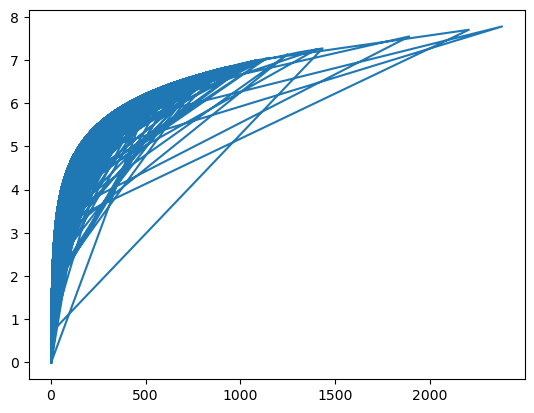

In [23]:
import matplotlib.pyplot as plt

plt.plot(kakao['Review'], kakao['newReview'])

In [49]:
mango['Category'].value_counts()
kakao['Category'].unique()

array(['육류,고기', '한식', '양식', '디저트카페', '삼겹살', '게,대게', '조개', '수제비', '해물,생선',
       '장어', '카페', '국수', '베트남음식', '떡볶이', '중국요리', '냉면', '돈까스, 회, 일식',
       '족발,보쌈', '태국음식', '곱창,막창', '양꼬치', '중식', '카페/디저트', '야식', '피자', nan,
       '아시아음식', '제과,베이커리', '패스트푸드', '스테이크,립', '삼계탕', '음식점', '실내포장마차',
       '국밥', '오리', '아구', '샌드위치', '인도음식', '쌈밥', '치킨', '햄버거', '키즈카페', '분식',
       '기사식당', '해산물뷔페', '뷔페', '바닷가재', '고기뷔페', '동남아음식', '추어', '멕시칸,브라질',
       '토스트', '굴,전복', '닭강정', '퓨전요리', '도시락', '라이브카페', '샐러드', '다방', '퓨전중식',
       '푸드코트', '터키음식', '채식뷔페', '철판요리', '오뎅바', '구내식당'], dtype=object)

In [48]:
#kakao 카테고리 정리
cafe = ['북카페', '커피전문점', '테마카페', '보드카페', '전통찻집', '애견카페', '고양이카페', '만화카페', '무인카페', '도넛', '갤러리카페', 
       '간식', '떡,한과', '아이스크림', '떡카페', '사주카페', '초콜릿', '다방', '라이브카페', '제과,베이커리', '디저트카페', '키즈카페',
       '샐러드', ]
#'돈까스, 회, 일식' 
japan = ['돈까스,우동', '참치회', '회', '일식','초밥,롤', '일식집', '일본식라면', '퓨전일식']
#'한식'
korea = ['샤브샤브', '설렁탕', '감자탕', '찌개,전골',  '매운탕,해물탕', '사철탕,영양탕', '해장국', '곰탕', '죽','한정식', '갈비',
       '두부전문점', '닭요리', '퓨전한식', '불고기,두루치기','한식뷔페',  '순대', '복어', '국수', '장어', '추어', '아구', '국밥', '오리',
        '기사식당', '쌈밥']
# '야식' 
night = ['칵테일바', '술집', '와인바',  '일본식주점', '호프,요리주점']
#'양식'
italy = ['이탈리안',  '패밀리레스토랑', '스테이크,립']
# 패스트푸드
fast = ['햄버거', '토스트']

for x in kakao['Category'] :
    if x in cafe :
        kakao['Category'] = kakao['Category'].replace(x, '카페/디저트')
    elif x in japan :
        kakao['Category'] = kakao['Category'].replace(x, '돈까스, 회, 일식')
    elif x in korea :
        kakao['Category'] = kakao['Category'].replace(x, '한식')
    elif x in night :
        kakao['Category'] = kakao['Category'].replace(x, '야식')
    elif x in italy :
        kakao['Category'] = kakao['Category'].replace(x, '양식')

In [6]:
display(mango.head())
display(kakao.head())

,Title,Rating,Category,View,Review
0,스시하쿠야,4.4,회 / 스시,"20,792",8
1,노원목고기집,4.3,고기 요리,"85,225",34
2,경성초밥,4.3,회 / 스시,"36,925",19
3,당혹,4.3,카페 / 디저트,"16,056",12
4,땅코참숯구이 (노원점),4.3,고기 요리,"16,174",18


,Category,Rating,RatingNum,Review,new,도로명,latitude,longitude,행정구
0,"육류,고기",3.4,61건,135,강강술래 상계지점,서울 노원구 동일로 1628 1층,37.673692,127.055257,노원구
1,한식,4.9,385건,228,감동식당,서울 노원구 한글비석로47길 58 1층,37.659783,127.066045,노원구
2,양식,4.2,47건,250,로니로티 노원점,서울 노원구 상계로 63-7 청우빌딩 2층 201호,37.656717,127.063254,노원구
3,디저트카페,3.9,112건,355,라라브레드 공릉점,서울 노원구 공릉로41길 32,37.624630,127.078503,노원구
4,한식,4.7,126건,171,경복식당,서울 노원구 공릉로39길 10,37.623748,127.078514,노원구


In [9]:
df = pd.merge(kakao, mango, on = 'new', how = 'left')
df.shape

(10473, 14)

In [10]:
df

,Category_x,Rating_x,RatingNum,Review_x,new,도로명,latitude,longitude,행정구,Title,Rating_y,Category_y,View,Review_y
0,"육류,고기",3.4,61건,135,강강술래 상계지점,서울 노원구 동일로 1628 1층,37.673692,127.055257,노원구,NaN,NaN,NaN,NaN,NaN
1,한식,4.9,385건,228,감동식당,서울 노원구 한글비석로47길 58 1층,37.659783,127.066045,노원구,감동식당,4.2,고기 요리,"3,590",7.0
2,양식,4.2,47건,250,로니로티 노원점,서울 노원구 상계로 63-7 청우빌딩 2층 201호,37.656717,127.063254,노원구,NaN,NaN,NaN,NaN,NaN
3,디저트카페,3.9,112건,355,라라브레드 공릉점,서울 노원구 공릉로41길 32,37.624630,127.078503,노원구,NaN,NaN,NaN,NaN,NaN
4,한식,4.7,126건,171,경복식당,서울 노원구 공릉로39길 10,37.623748,127.078514,노원구,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10468,회,4.0,8건,14,어사출또 암사역점,서울 강동구 올림픽로 794 1층,37.541280,127.124340,강동구,NaN,NaN,NaN,NaN,NaN
10469,회,5.0,1건,6,김선장횟집,서울 강동구 올림픽로98길 49,37.550800,127.129570,강동구,NaN,NaN,NaN,NaN,NaN
10470,"곱창,막창",4.5,8건,9,종로곱창,서울 강동구 구천면로34길 38,37.543080,127.134375,강동구,NaN,NaN,NaN,NaN,NaN
10471,중식,4.8,10건,73,중경해선훠궈,서울 강동구 천호옛길 94-6,37.534100,127.123770,강동구,NaN,NaN,NaN,NaN,NaN


In [50]:
kakao.shape[0], mango.shape[0]

(10473, 2196)

In [21]:
kakao.shape[0] + mango.shape[0], df.shape

(12669, (10473, 13))

In [41]:
drop

,Category_x,Rating_x,RatingNum,Review_x,new,도로명,latitude,longitude,행정구,Title,Rating_y,Category_y,View,Review_y
385,분식,3.4,12건,25,영스넥,서울 노원구 상계로 51 노원프라자빌딩 지하1층,37.658740,127.071300,노원구,NaN,NaN,NaN,NaN,NaN
606,순대,4.5,19건,15,소문난순대국,서울 중랑구 상봉로11길 32,37.590096,127.092311,중랑구,NaN,NaN,NaN,NaN,NaN
745,카페,4.6,11건,4,시즌,서울 중랑구 사가정로49길 62 1층,37.582771,127.086765,중랑구,시즌,3.9,카페 / 디저트,"2,292",5.0
897,갈비,4.9,10건,1,태능숯불갈비,서울 중랑구 면목로37길 14,37.579654,127.084287,중랑구,NaN,NaN,NaN,NaN,NaN
971,삼겹살,4.5,2건,1,싹쓰리솥뚜껑김치삼겹살,서울 중랑구 봉우재로 97,37.591980,127.083170,중랑구,싹쓰리솥뚜껑김치삼겹살,3.7,고기 요리,"4,013",10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,두부전문점,3.3,9건,28,우리콩손두부,서울 강동구 진황도로 100,37.534435,127.139929,강동구,NaN,NaN,NaN,NaN,NaN
10362,중국요리,2.5,18건,8,다래성,서울 강동구 구천면로100길 11,37.549508,127.171768,강동구,NaN,NaN,NaN,NaN,NaN
10372,닭요리,4.3,12건,15,전통춘천닭갈비,서울 강동구 고덕로10길 18,37.552792,127.129704,강동구,NaN,NaN,NaN,NaN,NaN
10439,양꼬치,3.5,6건,18,청도양꼬치,서울 강동구 진황도로47길 58,37.537011,127.140726,강동구,NaN,NaN,NaN,NaN,NaN


In [44]:
drop = df[df.duplicated(subset = 'new')]
df[df['new'] == '청도양꼬치']

,Category_x,Rating_x,RatingNum,Review_x,new,도로명,latitude,longitude,행정구,Title,Rating_y,Category_y,View,Review_y
295,양꼬치,3.0,8건,8,청도양꼬치,서울 노원구 노해로83길 18-6 2층,37.656157,127.065069,노원구,NaN,NaN,NaN,NaN,NaN
3655,양꼬치,3.3,6건,9,청도양꼬치,서울 성북구 화랑로40길 61 3층,37.613407,127.063543,성북구,NaN,NaN,NaN,NaN,NaN
10439,양꼬치,3.5,6건,18,청도양꼬치,서울 강동구 진황도로47길 58,37.537011,127.140726,강동구,NaN,NaN,NaN,NaN,NaN


In [51]:
df['도로명'].isnull().sum()

0

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('대화_data.csv')
df['Emotion'].value_counts()
lst = ['행복', '분노', '혐오']
df = df[df['Emotion'].isin(lst)]

df = df.replace({'행복' : 1, '분노' : 0, '혐오' : 0}).reset_index(drop = True)
df['Emotion'].value_counts()
df.head()

add = pd.read_csv('ChatbotData.csv')
add = add[add['label'] == 2][['A', 'label']].rename(columns = {'A' : 'Sentence', 'label' : 'Emotion'}).replace(2, 1).reset_index(drop = True)
df = pd.concat([df, add],axis = 0).reset_index(drop = True)
df.head()

,Sentence,Emotion
0,서해 수자원도 한류라서 그동안 불법조업 방치했나?,0
1,니가 인간이가.,0
2,강아지를 때리고 유기하는것만 학대는 아닙니다!,0
3,하여간 우리나라 교육엔 미래가 없어!!,0
4,채널에이 군부 개인거 인증하냐 동아일보야!!,0


In [22]:
from eunjeon import Mecab

new = []
mecab = Mecab()

with open('stopword.txt', 'r', encoding = 'utf8') as f:
    stop = f.read()
    
stop =  stop.split('\n')
add = ['는데', '네요', '어요', '너무', '아서', '보다', '해서', '다고', '정말', '많이', '맛있']

stop = stop + add

for txt in df['Sentence'] :
    
    text = re.compile('[^가-힣\s]').sub('', str(txt))
    
#     text = mecab.pos(text)
    
#     text = [x[0] for x in text if x[0] not in stop]
#     text = [x for x in text if len(x) > 1]
    
    new.append(text)
    
df['new_text'] = new
df.head()

,Sentence,Emotion,new_text
0,서해 수자원도 한류라서 그동안 불법조업 방치했나?,0,서해 수자원도 한류라서 그동안 불법조업 방치했나
1,니가 인간이가.,0,니가 인간이가
2,강아지를 때리고 유기하는것만 학대는 아닙니다!,0,강아지를 때리고 유기하는것만 학대는 아닙니다
3,하여간 우리나라 교육엔 미래가 없어!!,0,하여간 우리나라 교육엔 미래가 없어
4,채널에이 군부 개인거 인증하냐 동아일보야!!,0,채널에이 군부 개인거 인증하냐 동아일보야


In [23]:
df0 = df.drop_duplicates(subset = 'new_text')
df.shape, df0.shape

((20094, 3), (19590, 3))

<AxesSubplot:>

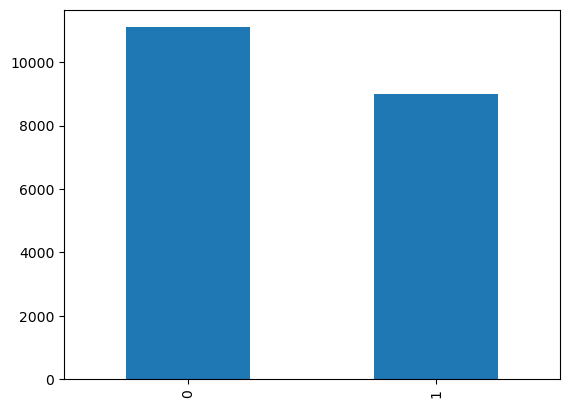

In [24]:
df['Emotion'].value_counts().plot(kind = 'bar')

In [25]:
df['new_text'].isnull().sum()

0

In [26]:
train, val = train_test_split(df0, test_size = 0.2, shuffle = True, stratify = df0['Emotion'], random_state = 306)
train['Emotion'].value_counts() , val['Emotion'].value_counts()

(0    8870
 1    6802
 Name: Emotion, dtype: int64,
 0    2218
 1    1700
 Name: Emotion, dtype: int64)

In [27]:
new = []
mecab = Mecab()

with open('stopword.txt', 'r', encoding = 'utf8') as f:
    stop = f.read()
    
stop =  stop.split('\n')
add = ['는데', '네요', '어요', '너무', '아서', '보다', '해서', '다고', '정말', '많이', '맛있']

stop = stop + add

for txt in df['Sentence'] :
    
    text = re.compile('[^가-힣\s]').sub('', str(txt))
    
#     text = mecab.pos(text)
    
#     text = [x[0] for x in text if x[0] not in stop]
#     text = [x for x in text if len(x) > 1]
    
    new.append(text)
    
df['new_text'] = new
df.head()

,Sentence,Emotion,new_text
0,서해 수자원도 한류라서 그동안 불법조업 방치했나?,0,서해 수자원도 한류라서 그동안 불법조업 방치했나
1,니가 인간이가.,0,니가 인간이가
2,강아지를 때리고 유기하는것만 학대는 아닙니다!,0,강아지를 때리고 유기하는것만 학대는 아닙니다
3,하여간 우리나라 교육엔 미래가 없어!!,0,하여간 우리나라 교육엔 미래가 없어
4,채널에이 군부 개인거 인증하냐 동아일보야!!,0,채널에이 군부 개인거 인증하냐 동아일보야


In [28]:
with open('stopword.txt', 'r', encoding = 'utf8') as f:
    stop = f.read()
    
stop =  stop.split('\n')
add = ['는데', '네요', '어요', '너무', '아서', '보다', '해서', '다고', '정말', '많이', '맛있']

stop = stop + add

X_train = []
mecab = Mecab()

for txt in train['new_text'] : 
    text = mecab.morphs(txt)
    text = [x for x in text if x not in stop]
    
    X_train.append(text)
#     text = [x for x in text if len(x) > 1]

X_val = []
mecab = Mecab()

for txt in val['new_text'] : 
    text = mecab.morphs(txt)
    text = [x for x in text if x not in stop]
    
    X_val.append(text)

In [29]:
X_train

[['문화재청', '놈', '손', '문화재', '는', '문화재', '라', '화재', '뿐', '다'],
 ['사람', '마다', '정도', '는', '다르', '정확', '게', '의사', '표현', '는', '중요'],
 ['좋', '는', '감정', '느낀다는', '자체', '행복', '한', '거', '예요'],
 ['앞', '아무', '도', '투표', '지', '않', '듯'],
 ['구조', '느라', '수고', '많', '으셨어요'],
 ['임정우', '잘', '해', '줬', '다'],
 ['내', '달', '봉급', '다'],
 ['걱정', '되', '지', '않', '선', '인', '같', '아요'],
 ['이게', '새', '누리', '당', '친', '박의', '실체'],
 ['똑같', '은', '거', '보', '니깐', '넘', '재밌', '더라'],
 ['정현', '순천', '오지마', '라', '대', '리', '박살', '난다'],
 ['국', '대', '에선', '빠른', '패스', '연계', '보', '기', '힘', '듦'],
 ['국민', '은', '피눈물', '흘', '립니', '다'],
 ['기상청', '슈퍼', '컴', '북한', '늑대', '나타났'],
 ['존중'],
 ['고기', '산', '도', '의심', '스럽', '유기농', '도', '믿', '못', '되'],
 ['왠지', '아들놈', '보호', '한답시고', '덮', '쓴', '거', '같', '은데'],
 ['이거', '일본', '캐릭터', '아닌가', '역시', '순', '실'],
 ['유재석', '오라버니', '추석', '연휴', '되', '었', '연휴', '가족', '보냈', '겠'],
 ['저거', '누가', '허가', '내주', '었', '는지', '낱', '났', '밝혀야', '합니다'],
 ['이건', '놈', '해', '쳐먹', '는겨'],
 ['특검', '힘내', '세요'],
 ['싸', '게', '면', '저딴', '짓', 

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'는': 1, '고': 2, '다': 3, '은': 4, '도': 5, '지': 6, '게': 7, '있': 8, '한': 9, '거': 10, '보': 11, '해': 12, '면': 13, '좋': 14, '안': 15, '겠': 16, '없': 17, '만': 18, '냐': 19, '주': 20, '같': 21, '세요': 22, '말': 23, '되': 24, '기': 25, '진짜': 26, '라': 27, '잘': 28, '할': 29, '사람': 30, '니': 31, '나라': 32, '었': 33, '했': 34, '합니다': 35, '수': 36, '않': 37, '님': 38, '국민': 39, '감사': 40, '받': 41, '더': 42, '시': 43, '못': 44, '생각': 45, '서': 46, '개': 47, '내': 48, '적': 49, '인': 50, '해라': 51, '사랑': 52, '라고': 53, '알': 54, '돈': 55, '았': 56, '싶': 57, '아요': 58, '으면': 59, '많': 60, '뭐': 61, '쓰레기': 62, '축하': 63, '음': 64, '듯': 65, '놈': 66, '먹': 67, '한다': 68, '박근혜': 69, '대통령': 70, '죠': 71, '건': 72, '예요': 73, '넘': 74, '살': 75, '실': 76, '그냥': 77, '면서': 78, '요': 79, '던': 80, '이나': 81, '한테': 82, '이제': 83, '쓰': 84, '길': 85, '인간': 86, '선수': 87, '마음': 88, '분': 89, '기사': 90, '오늘': 91, '입니다': 92, '여자': 93, '한국': 94, '걸': 95, '지금': 96, '전': 97, '마': 98, '만들': 99, '해야': 100, '어서': 101, '대': 102, '다는': 103, '데': 104, '대한민국': 105, '인데': 106, '

In [31]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items() :
    total_freq = total_freq + value
    
    if value < threshold :
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(total_cnt)
print(rare_cnt)
print(rare_cnt / total_cnt * 100)
print(rare_freq / total_freq * 100)

15082
7678
50.90836759050524
5.845006090133983


In [32]:
vocab_size = total_cnt - rare_cnt + 1
print(vocab_size)

7405


In [33]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_val)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [34]:
train

,Sentence,Emotion,new_text
12759,문화재청 놈들의 손에서 문화재는 문화재가 아니라 화재일 뿐이다.,0,문화재청 놈들의 손에서 문화재는 문화재가 아니라 화재일 뿐이다
18505,사람마다 정도는 다르지만 정확하게 의사 표현하는 것이 중요해요.,1,사람마다 정도는 다르지만 정확하게 의사 표현하는 것이 중요해요
17844,좋아하는 감정을 느낀다는 자체가 참 행복한 거예요.,1,좋아하는 감정을 느낀다는 자체가 참 행복한 거예요
2658,앞으로 아무도 투표하지않을듯..,0,앞으로 아무도 투표하지않을듯
7024,구조 하느라 수고 많으셨어요 ^^,1,구조 하느라 수고 많으셨어요
...,...,...,...
10660,시청자들도 진심으로 기뻐하고 환호했다ㅋㅋㅋ,1,시청자들도 진심으로 기뻐하고 환호했다
16735,이러다 연인 사이 들통 나면 혼난다,0,이러다 연인 사이 들통 나면 혼난다
12754,소비자를 우롱하는 폭스바겐은 나가라!,0,소비자를 우롱하는 폭스바겐은 나가라
4975,아시아놈들 다시 먹힐려고 단체로작정했네 ㅉㅉ,0,아시아놈들 다시 먹힐려고 단체로작정했네


In [35]:
y_train = np.array(train['Emotion'])
y_val = np.array(val['Emotion'])

In [36]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [37]:
# X_train = np.delete(X_train, drop_train, axis=0)
# y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

15672
15672


리뷰의 최대 길이 : 147
리뷰의 평균 길이 : 7.308320571720265


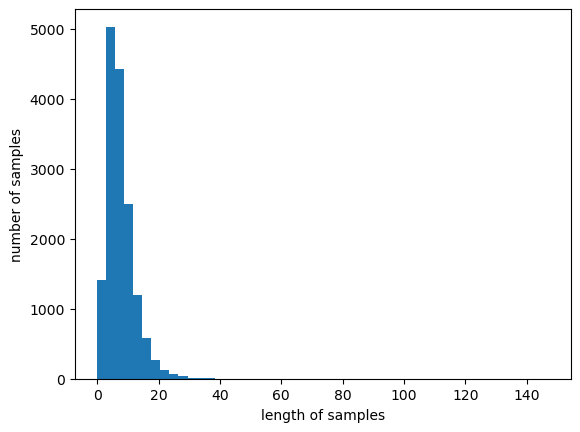

In [38]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [40]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 99.97447677386421


In [41]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)

In [42]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
196/196 [==============================] - ETA: 0s - loss: 0.4640 - acc: 0.7704
Epoch 1: val_acc improved from -inf to 0.88038, saving model to best_model.h5
196/196 [==============================] - 15s 61ms/step - loss: 0.4640 - acc: 0.7704 - val_loss: 0.2943 - val_acc: 0.8804
Epoch 2/15
196/196 [==============================] - ETA: 0s - loss: 0.2682 - acc: 0.8931
Epoch 2: val_acc did not improve from 0.88038
196/196 [==============================] - 12s 60ms/step - loss: 0.2682 - acc: 0.8931 - val_loss: 0.2806 - val_acc: 0.8788
Epoch 3/15
196/196 [==============================] - ETA: 0s - loss: 0.2284 - acc: 0.9122
Epoch 3: val_acc improved from 0.88038 to 0.89537, saving model to best_model.h5
196/196 [==============================] - 11s 58ms/step - loss: 0.2284 - acc: 0.9122 - val_loss: 0.2503 - val_acc: 0.8954
Epoch 4/15
196/196 [==============================] - ETA: 0s - loss: 0.2022 - acc: 0.9222
Epoch 4: val_acc did not improve from 0.89537
196/196 [=======

In [43]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_val, y_val)[1]))

123/123 [==============================] - 2s 11ms/step - loss: 0.2650 - acc: 0.9007

 테스트 정확도: 0.9007


In [71]:
def sentiment_predict(new_sentence):
    
#     new_sentence = re.compile('[^가-힣\s]').sub('', new_sentence)
# #     new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)

#     new_sentence = mecab.morphs(new_sentence) # 토큰화
#     new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    
    if(score > 0.5):
        ans = "{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100)
    else:
        ans = "{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100)
        
    return ans

In [69]:
import re
df0 = pd.read_csv('서울대_20.csv')

new = []
mecab = Mecab()

with open('stopword.txt', 'r', encoding = 'utf8') as f:
    stop = f.read()
stop =  stop.split('\n')
add = ['는데', '네요', '어요', '너무', '아서', '보다', '해서', '다고', '정말', '많이', '맛있']
stop = stop + add

for txt in df0['review_txt'] :
    
    text = re.compile('[^가-힣\s]').sub('', str(txt))  
    text = mecab.morphs(text)
    
    text = [x for x in text if x not in stop]
    
    new.append(text)
    
df0['new_text'] = new
df0.head()

,Unnamed: 0,Store,Category,Rating,RatingNum,Review,Address,review_txt,menu,price,new_text
0,0,쟝블랑제리,"제과,베이커리",3.7,366건,854,서울 관악구 낙성대역길 8\n(지번) 봉천동 1660-7,['빵은 맛있는데\n캐셔 보는 직원분들 졸라 싸가지 없네 진짜\n4점 줬다가 1점으...,X,X,"[빵, 은, 는, 데, 캐, 셔, 보, 는, 직원, 분, 졸라, 싸, 가지, 없네,..."
1,1,고기굽는사람들 샤로수길본점,"육류,고기",4.4,172건,119,서울 관악구 관악로14길 70 1층\n(지번) 봉천동 1619-1,['부드러운 고기와 달달한 양념 갈비. \n딱 무한 리필의 기본을 잘 지키고 있었습...,차돌라면,"5,900","[부드러운, 고기, 달달, 한, 양념, 갈비, 무한, 리필, 기본, 잘, 지키, 고..."
2,2,킷사서울,일식,3.0,125건,584,서울 관악구 남부순환로226길 31 2층\n(지번) 봉천동 1603-3,['일단 가격 인상이 있어서 가성비 부분은 뺐지만 음식은 괜찮아요 양도 적당하구요....,단뽀뽀 오므라이스,"11,000","[가격, 인상, 있, 어서, 성비, 부분, 은, 뺐, 음식, 은, 괜찮, 아요, 양..."
3,3,기절초풍왕순대,순대,3.9,110건,231,"서울 관악구 봉천로62길 2 1,2층\n(지번) 봉천동 1620-38",['순대국에 고기가 푸짐하게 들어있어서 깜짝 놀랬습니다! 잡내 안나고 맛있습니다 \...,왕순대,"18,000","[순, 대국, 고기, 푸짐, 게, 있, 어서, 깜짝, 놀랬, 잡, 내, 안, 고, ..."
4,4,논밭골 봉천점,갈비,3.3,48건,66,서울 관악구 청룡길 30\n(지번) 봉천동 915-26,['고기 질은 좋은편이였으나\n가격이 사악했음\n배부르게 먹기엔 좀 \n가격만 내리...,왕갈비탕,"12,000","[고기, 질, 은, 좋, 은, 편, 였으나, 가격, 사악, 했, 음, 배부르, 게,..."


In [73]:
df0

,Unnamed: 0,Store,Category,Rating,RatingNum,Review,Address,review_txt,menu,price,new_text,result
0,0,쟝블랑제리,"제과,베이커리",3.7,366건,854,서울 관악구 낙성대역길 8\n(지번) 봉천동 1660-7,['빵은 맛있는데\n캐셔 보는 직원분들 졸라 싸가지 없네 진짜\n4점 줬다가 1점으...,X,X,"[빵, 은, 는, 데, 캐, 셔, 보, 는, 직원, 분, 졸라, 싸, 가지, 없네,...",57.36% 확률로 부정 리뷰입니다.\n
1,1,고기굽는사람들 샤로수길본점,"육류,고기",4.4,172건,119,서울 관악구 관악로14길 70 1층\n(지번) 봉천동 1619-1,['부드러운 고기와 달달한 양념 갈비. \n딱 무한 리필의 기본을 잘 지키고 있었습...,차돌라면,"5,900","[부드러운, 고기, 달달, 한, 양념, 갈비, 무한, 리필, 기본, 잘, 지키, 고...",90.21% 확률로 긍정 리뷰입니다.\n
2,2,킷사서울,일식,3.0,125건,584,서울 관악구 남부순환로226길 31 2층\n(지번) 봉천동 1603-3,['일단 가격 인상이 있어서 가성비 부분은 뺐지만 음식은 괜찮아요 양도 적당하구요....,단뽀뽀 오므라이스,"11,000","[가격, 인상, 있, 어서, 성비, 부분, 은, 뺐, 음식, 은, 괜찮, 아요, 양...",93.69% 확률로 긍정 리뷰입니다.\n
3,3,기절초풍왕순대,순대,3.9,110건,231,"서울 관악구 봉천로62길 2 1,2층\n(지번) 봉천동 1620-38",['순대국에 고기가 푸짐하게 들어있어서 깜짝 놀랬습니다! 잡내 안나고 맛있습니다 \...,왕순대,"18,000","[순, 대국, 고기, 푸짐, 게, 있, 어서, 깜짝, 놀랬, 잡, 내, 안, 고, ...",84.36% 확률로 부정 리뷰입니다.\n
4,4,논밭골 봉천점,갈비,3.3,48건,66,서울 관악구 청룡길 30\n(지번) 봉천동 915-26,['고기 질은 좋은편이였으나\n가격이 사악했음\n배부르게 먹기엔 좀 \n가격만 내리...,왕갈비탕,"12,000","[고기, 질, 은, 좋, 은, 편, 였으나, 가격, 사악, 했, 음, 배부르, 게,...",73.68% 확률로 긍정 리뷰입니다.\n
5,5,오월의김밥,분식,4.4,151건,350,서울 관악구 봉천로 605\n(지번) 봉천동 1657-21,['부재료 까이이득 들은 아주 듬직한 김밥!! \n기대하고 먹었는데도 실망없는 맛이...,밥도둑김밥,"5,000","[부, 재료, 까, 이득, 은, 아주, 듬직, 한, 김밥, 기대, 고, 먹, 었, ...",95.99% 확률로 긍정 리뷰입니다.\n
6,6,외래향 서울대점,중국요리,3.3,117건,122,서울 관악구 남부순환로 1801 2층 201호\n(지번) 봉천동 874-4,['몇년전에 처음 와보고 맛있게 먹고 주변 사람들이 맛집 추천해달라 하면 항상 추천...,자장면,"7,000","[전, 처음, 보, 고, 게, 먹, 고, 주변, 사람, 맛집, 추천, 해, 달, 라...",50.55% 확률로 긍정 리뷰입니다.\n
7,7,동명 IZAKAYA,일본식주점,4.6,33건,197,서울 관악구 남현1길 42 남현빌딩 4층\n(지번) 남현동 1062-23,['서빙 해주시는 분이 굉장히 센스 있으세요. 필요한 것들 말씀 안드려도 척척 가져...,사시미 모리아와세 中,"40,000","[서빙, 해, 주, 시, 는, 분, 굉장히, 센스, 있, 으세요, 필요, 한, 말씀...",85.63% 확률로 긍정 리뷰입니다.\n
8,8,텐동요츠야,일식,3.7,350건,534,서울 관악구 관악로14길 35 1층\n(지번) 봉천동 1603-19,['평일 저녁 오픈 10분 전에 도착해서 30분 웨이팅하고 자리 앉은 후 10분 기...,에비죠텐동,"13,500","[평일, 저녁, 오픈, 분, 전, 도착, 분, 웨이팅, 고, 자리, 앉, 은, 후,...",67.84% 확률로 부정 리뷰입니다.\n
9,9,제주상회,국수,4.3,103건,131,서울 관악구 관악로12길 108 지하 1층\n(지번) 봉천동 1625-1,['특별한 맛집은 아닌듯\n제주도 한달살기 시절 생각하고 갔는데\n그냥 고기국수\n...,고기국수,"9,000","[특별, 한, 맛집, 은, 아닌, 듯, 제주, 도, 한, 달, 살, 기, 시절, 생...",57.66% 확률로 긍정 리뷰입니다.\n


In [72]:
res = []
for x in df0['new_text'] :
    
    ans = sentiment_predict(x)
    res.append(ans)

df0['result'] = res

1/1 [==============================] - 0s 25ms/step


In [65]:
new = []
mecab = Mecab()

with open('stopword.txt', 'r', encoding = 'utf8') as f:
    stop = f.read()
stop =  stop.split('\n')
add = ['는데', '네요', '어요', '너무', '아서', '보다', '해서', '다고', '정말', '많이', '맛있']
stop = stop + add

for txt in df0['review_txt'] :
    
    text = re.compile('[^가-힣\s]').sub('', str(txt))  
    text = mecab.morphs(text)
    
    text = [x[0] for x in text if x[0] not in stop]
    
    new.append(text)
    
df['new_text'] = new
df.head()

ValueError: Length of values (20) does not match length of index (20094)

In [52]:
import pandas as pd
import numpy as np
import re

In [53]:
test = pd.read_csv('서울대_20.csv')

tst = []
for txt in test['review_txt'] :
    
    text = re.compile('[^가-힣.,?!\s]').sub('', str(txt))
    tst.append(text)

test['tst'] = tst